<a href="https://colab.research.google.com/github/NeginS98/email-spam-detection/blob/main/EmailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np 
import os 
import random 
import seaborn as sns
import warnings 
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import metrics

## **Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp "/content/drive/My Drive/Colab Notebooks/spam_ham_dataset.csv" "Emaildata.csv"

In [24]:
data = pd.read_csv('Emaildata.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
data.columns = ['category', 'text', 'spam_email']

In [26]:
data

,category,text,spam_email
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [11]:
info = pd.DataFrame({'Missing data': data.isnull().sum(), 
                     'Type of data': data.dtypes, 
                     'Count of data': len(data)})
info

,Missing data,Type of data,Count of data
label,0,object,5171
text,0,object,5171
label_num,0,int64,5171


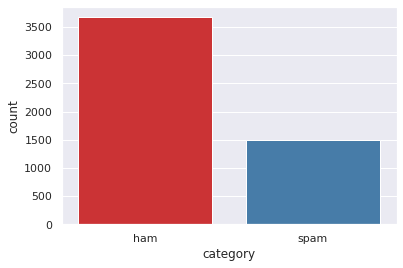

In [122]:
sns.countplot(data.category, palette='Set1')

In [28]:
from sklearn.model_selection import train_test_split
X = data.text
Y = data.spam_email

In [30]:
# !pip install nlp-tools

In [39]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
def precess_text(text):
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean_words

## **Multinomia Model**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

txt = CountVectorizer(analyzer=precess_text).fit_transform(X)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(txt, Y, test_size=0.2)

In [59]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       721
           1       0.96      0.96      0.96       314

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



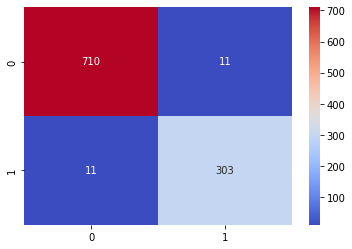

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True, fmt='1.0f')
plt.show()

In [72]:
print('accuracy_score : ',np.round(accuracy_score(y_test, y_pred), 2))

accuracy_score :  0.98


In [82]:
def MultinomialNB_model(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    clf = MultinomialNB()
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'accuracy_score': metrics.accuracy_score(y_test, y_pred),
                 'precision_score': metrics.precision_score(y_test, y_pred),
                 'f1_score': metrics.f1_score(y_test, y_pred),
                 'AUC/ROC' : metrics.roc_auc_score(y_test, y_pred),
                 'recall_score': metrics.recall_score(y_test, y_pred)
                 }
    eval = eval.append(eval_dict, ignore_index=True)
  return (eval)

In [100]:
testsize = np.linspace(0.1, 0.35, 6)
MultinomialNB_model(txt, Y, np.round(testsize, 2))

,test size,accuracy_score,precision_score,f1_score,AUC/ROC,recall_score
0,0.10,0.971042,0.946667,0.949833,0.965670,0.953020
1,0.15,0.971649,0.947368,0.951542,0.966967,0.955752
2,0.20,0.973913,0.953947,0.955519,0.968985,0.957096
3,0.25,0.976798,0.954545,0.959677,0.973223,0.964865
4,0.30,0.978737,0.955711,0.961313,0.975069,0.966981
5,0.35,0.976796,0.953033,0.958661,0.972983,0.964356


In [101]:
df = MultinomialNB_model(txt, Y, np.round(testsize, 2)).set_index('test size')
table = df.style
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
table.apply(highlight_max, props='color:black;font-weight:bold;background-color:khaki', axis=0)
table.set_caption("Different Accuracy Metrics for our spam detection")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.4em; background-color: grey ;color:black ;font-family:serif',
 }], overwrite=False)

,accuracy_score,precision_score,f1_score,AUC/ROC,recall_score
test size,,,,,
0.1,0.971042,0.946667,0.949833,0.965670,0.953020
0.15,0.971649,0.947368,0.951542,0.966967,0.955752
0.2,0.973913,0.953947,0.955519,0.968985,0.957096
0.25,0.976798,0.954545,0.959677,0.973223,0.964865
0.3,0.978737,0.955711,0.961313,0.975069,0.966981
0.35,0.976796,0.953033,0.958661,0.972983,0.964356


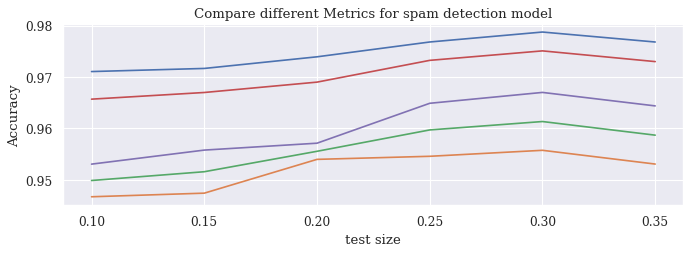

In [111]:
plt.figure(figsize=(10, 3), dpi=80)
plt.plot(df.accuracy_score)
plt.plot(df.precision_score)
plt.plot(df.f1_score)
plt.plot(df['AUC/ROC'])
plt.plot(df.recall_score)
plt.ylabel('Accuracy', fontfamily='serif')
plt.xlabel('test size', fontfamily='serif')
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.title('Compare different Metrics for spam detection model', fontfamily='serif')
sns.set_theme(style="darkgrid")
plt.show()